In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import metrics
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from linregress import linearly_regress
from linregress import model_averages

In [2]:
# Open and view CSV file
df = pd.read_csv('data/kc_house_data.csv')

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
# Drop NaNs
df.dropna(inplace=True)

## Cleaning Data

In [4]:
# View all unique values in 'waterfront' column
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [5]:
# Encode 'waterfront' column
df.replace({'NO': 0, 'YES': 1}, inplace = True)

In [6]:
# View all unique values in 'view' column
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [7]:
# Encode 'view' column 
df.replace({'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}, inplace= True)

In [8]:
# View all unique values in 'grade' column
df['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [9]:
# Encode 'grade' column
df.replace({'7 Average': 7, '8 Good': 8, '11 Excellent': 11, '9 Better': 9, '6 Low Average': 6, '5 Fair': 5, '10 Very Good': 10, '12 Luxury': 12, '4 Low': 4, '3 Poor': 3, '13 Mansion': 13}, inplace = True)

In [10]:
# View all unique values in 'condition' column
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [11]:
# Encode 'condition' column
df.replace({'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace = True)

In [12]:
# Set Year Renovated to Year Built if Year Renovated = 0
df['yr_renovated'].mask(df['yr_renovated'] == 0, df['yr_built'], inplace = True)


In [13]:
# Drop columns that are unneccessary and to avoid multi-colinearity
df.drop(columns = ['yr_built', 'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement'], inplace = True)

In [14]:
# View columns
df.columns

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Explorative Data Analysis

In [15]:
# Create a DataFrame for regression
regression_df = df.drop(columns = ['id', 'date', 'sqft_lot15', 'sqft_living15', 'sqft_lot'])

In [16]:
# Create Correlation Matrix
regression_df.corr()

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,long
price,1.000000,0.706189,0.259505,0.274212,0.396862,0.034367,0.664146,0.100023,-0.049502,0.306607,0.021215
sqft_living,0.706189,1.000000,0.359407,0.111491,0.285506,-0.062319,0.764251,0.338318,-0.196537,0.058394,0.239521
floors,0.259505,0.359407,1.000000,0.018382,0.027518,-0.261013,0.459843,0.499460,-0.058130,0.058190,0.129769
waterfront,0.274212,0.111491,0.018382,1.000000,0.409773,0.016454,0.083034,-0.001108,0.030391,-0.015935,-0.042324
view,0.396862,0.285506,0.027518,0.409773,1.000000,0.046354,0.248679,-0.023260,0.086479,0.008403,-0.078500
condition,0.034367,-0.062319,-0.261013,0.016454,0.046354,1.000000,-0.147810,-0.401191,0.001685,-0.022250,-0.105823
grade,0.664146,0.764251,0.459843,0.083034,0.248679,-0.147810,1.000000,0.456067,-0.184120,0.117425,0.200680
yr_renovated,0.100023,0.338318,0.499460,-0.001108,-0.023260,-0.401191,0.456067,1.000000,-0.316609,-0.130761,0.380645
zipcode,-0.049502,-0.196537,-0.058130,0.030391,0.086479,0.001685,-0.184120,-0.316609,1.000000,0.267763,-0.562154
lat,0.306607,0.058394,0.058190,-0.015935,0.008403,-0.022250,0.117425,-0.130761,0.267763,1.000000,-0.133840


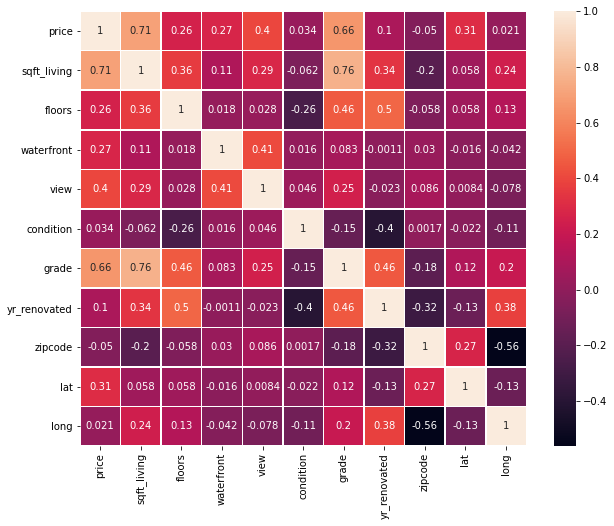

In [17]:
# Create Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(regression_df.corr(), linewidth = 0.5, annot = True, ax = ax );

In [18]:
# Create dummy data frame for zipcodes as they are nominal categories
zipcode_dummies_df = pd.get_dummies(regression_df['zipcode'], drop_first = True)

In [19]:
# Add the dummy data frame to regression_df. Not dropping the zipcode until we actually run the model
regression_df = regression_df.join(zipcode_dummies_df)

In [20]:
# Drop Outliers
outlier_dropped_df = regression_df[regression_df['price'] < regression_df['price'].quantile(0.95)]


In [21]:
# View shape of new DataFrame
outlier_dropped_df.shape

(14970, 80)

<ipython-input-22-91dd3db7fc7b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


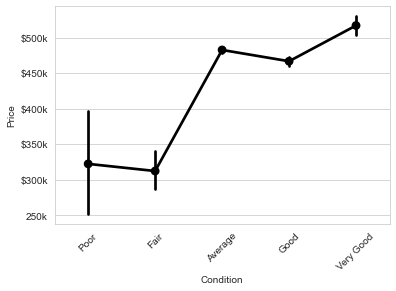

In [22]:
# Create boxplots to demonstrate relationship between condition and price
xlabels = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
ylabels = ['$200k', '250k', '$300k', '$350k', '$400k', '$450k', '$500k']
sns.set_style('whitegrid')
ax = sns.pointplot(x="condition", y="price", data=outlier_dropped_df, color = 'black')
ax.set_xticklabels(xlabels)
plt.xticks(rotation = 45)
ax.set_yticklabels(ylabels)
ax.set_ylabel('Price')
ax.set_xlabel('Condition')
plt.show()

## Create Models

In [23]:
# Create MultiLinear Regression Model
y= outlier_dropped_df['price']
X = outlier_dropped_df.drop(columns = ['price', 'floors', 'condition'])

results = linearly_regress(y, X)
print(results)


(LinearRegression(), 0.816800942530045, 67541.72446289471, 91807.87048048899)


In [24]:
# Execute a Log Transformation on Price and SqFt Living columns
log_scaled_df = regression_df.copy()

log_scaled_df['price'] = np.log(regression_df['price'])
log_scaled_df['sqft_living'] = np.log(regression_df['sqft_living'])

log_scaled_df

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
1,13.195614,7.851661,2.0,0,0,2,7,1991.0,98125,47.7210,...,0,0,0,0,0,0,0,0,0,0
3,13.311329,7.580700,1.0,0,0,4,7,1965.0,98136,47.5208,...,0,0,0,0,0,0,0,0,0,0
4,13.142166,7.426549,1.0,0,0,2,8,1987.0,98074,47.6168,...,0,0,0,0,0,0,0,0,0,0
5,14.022525,8.597851,1.0,0,0,2,11,2001.0,98053,47.6561,...,0,0,0,0,0,0,0,0,0,0
6,12.458775,7.447168,2.0,0,0,2,7,1995.0,98003,47.3097,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,13.071070,7.177782,2.0,0,0,2,8,2008.0,98116,47.5773,...,0,0,0,0,0,0,0,0,0,0
21592,12.793859,7.333023,3.0,0,0,2,8,2009.0,98103,47.6993,...,0,0,0,0,0,0,0,0,0,0
21593,12.899220,7.745003,2.0,0,0,2,8,2014.0,98146,47.5107,...,1,0,0,0,0,0,0,0,0,0
21594,12.904459,6.927558,2.0,0,0,2,7,2009.0,98144,47.5944,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Create Multi Linear Regression Model using transformed features
y= log_scaled_df['price']
X = log_scaled_df.drop(columns = ['price', 'floors', 'condition', 'zipcode'])

results = linearly_regress(y, X)
print(results)

(LinearRegression(), 0.8688700128387687, 0.14152018677917885, 0.19342341116466677)


## Create Final Model

We will be predicting the new prices of houses. Our model will train on houses that are in average or above average condition, and predict the price based on square footage, zipcode, and year renovated, among other predictors. We will then apply our model to houses in below average condition to predict what price they would be evaluated at if their condition were better. Our final model will take in logarithmically scale price and square-footage, and also one-hot encoded zipcodes. For a more accurate result, we also took 100 models and found the average predicted price for a higher accuracy. Our final model has an r-squared value of .867 and a mean absolute error of .14 (in unit of log(price)).

In [26]:
# Separate houses in 'good' condition and houses in 'bad' condition
good_df = log_scaled_df[log_scaled_df['condition'] >= 2]
bad_df = log_scaled_df[log_scaled_df['condition'] < 2]

In [27]:
# Train model on 'Good' condition houses
y_good = good_df['price']
X_good = good_df.drop(columns = ['price', 'floors', 'condition', 'zipcode'])

results = linearly_regress(y_good, X_good)

results

(LinearRegression(),
 0.871745795424109,
 0.13850016827015366,
 0.1867201245083786)

In [28]:
# Run model on bad condition houses
y_bad = bad_df['price']
X_bad = bad_df.drop(columns = ['price', 'floors', 'condition', 'zipcode'])

y_pred = results[0].predict(X_bad)

# Calculate difference between predicted Price and actual Price
y_difs = y_pred - y_bad

In [29]:
# Sort differences 
y_difs.sort_values(ascending = False)

16879    1.241239
880      0.881663
10573    0.825447
11784    0.818078
5522     0.789544
           ...   
14354   -0.617043
4081    -0.638207
19433   -0.644310
10416   -0.730977
8614    -1.056759
Name: price, Length: 150, dtype: float64

In [30]:
# Use function in lineregress.py to run 100 models
results = model_averages(y_good, X_good, y_bad, X_bad, 100)

results_df = results[0]
print(results[1])

0.1398044884287682


In [31]:
# Calculate the error over our models
mae = mean_absolute_error(np.exp(results_df['price']), np.exp(results_df['averages']))
mae

99914.62696700235

In [32]:
coefs = results[2]

Find the most import predictors based on their weight

In [101]:
weights_df = pd.DataFrame()
weights_df['name'] = X.columns
weights_df['weight'] = coefs.T.mean()
weights_df.head(15)

,name,weight
0,sqft_living,0.488491
1,waterfront,0.486545
2,view,0.071780
3,grade,0.117731
4,yr_renovated,-0.001065
5,lat,0.468336
6,long,-0.233978
7,98002,0.018536
8,98003,-0.003114
9,98004,1.032345


In [85]:
weights_df = weights_df.sort_values('weight', ascending = False)
weights_df.head(25)

,name,weight
30,98039,1.235462
9,98004,1.032345
54,98112,0.877945
31,98040,0.813773
59,98119,0.756958
47,98102,0.748777
49,98105,0.735259
53,98109,0.730279
10,98005,0.650017
27,98033,0.648619


In [104]:
weights_chart_df = weights_df.loc[weights_df['name'].isin(['sqft_living', 'waterfront', 'grade', 'view','yr_renovated'])]


<AxesSubplot:xlabel='name', ylabel='weight'>

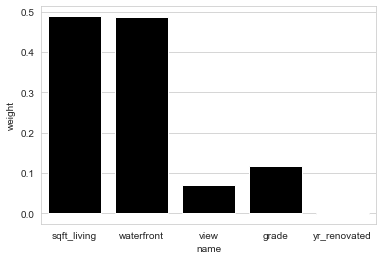

In [106]:
weights_chart_df.sort_values('weight')
sns.barplot(x = weights_chart_df['name'], y = weights_chart_df['weight'], color = 'black')


In [ ]:
# Unlogging price and averages
results_df['price'] = np.exp(results_df['price'])
results_df['averages'] = np.exp(results_df['averages'])

In [35]:
# Calculate expected return
results_difs = results_df['averages'] - results_df['price']

## Use model on properties in bad conditions

In [36]:
# Create Final DataFrame
final_df = regression_df[regression_df['condition'] < 2].copy()

final_df

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
36,550000.0,1660,1.0,0,0,0,5,1933.0,98052,47.6621,...,0,0,0,0,0,0,0,0,0,0
38,240000.0,1220,1.0,0,0,1,7,1969.0,98001,47.3341,...,0,0,0,0,0,0,0,0,0,0
242,455000.0,1430,1.5,0,0,1,7,1925.0,98115,47.6727,...,0,0,0,0,0,0,0,0,0,0
328,186375.0,1000,1.0,0,0,1,7,1952.0,98166,47.4720,...,0,0,0,1,0,0,0,0,0,0
380,270000.0,1380,1.0,0,0,0,6,1954.0,98011,47.7461,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19219,200000.0,960,1.0,0,0,1,6,1933.0,98024,47.5621,...,0,0,0,0,0,0,0,0,0,0
19284,174900.0,1100,1.5,0,0,1,6,1926.0,98108,47.5279,...,0,0,0,0,0,0,0,0,0,0
19348,290000.0,2340,2.0,0,0,1,8,1978.0,98042,47.3468,...,0,0,0,0,0,0,0,0,0,0
19433,450000.0,1350,1.0,0,0,1,6,1946.0,98055,47.4657,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Create Column for Predicted price and estimated renovation cost
final_df['pred_price_dif'] = results_difs
final_df['estimated_cost'] = final_df['sqft_living'] * 60

In [38]:
# Create column for estimated profit
final_df['estimated_profit'] = final_df['pred_price_dif'] - final_df['estimated_cost']

In [39]:
# Sort final_df by estimated profit
final_df.sort_values('estimated_profit', ascending = False, inplace = True)

In [40]:
final_df

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,...,98166,98168,98177,98178,98188,98198,98199,pred_price_dif,estimated_cost,estimated_profit
17524,425000.0,1730,1.0,0,0,1,7,1955.0,98004,47.5979,...,0,0,0,0,0,0,0,369415.617724,103800,265615.617724
16879,125000.0,1230,1.5,0,0,0,6,1916.0,98117,47.6941,...,0,0,0,0,0,0,0,301974.290756,73800,228174.290756
880,200000.0,1920,1.0,0,0,1,6,1914.0,98136,47.5507,...,0,0,0,0,0,0,0,276809.476286,115200,161609.476286
4655,302000.0,1600,2.0,0,0,1,7,1906.0,98122,47.6028,...,0,0,0,0,0,0,0,239148.843423,96000,143148.843423
11784,170000.0,1200,2.0,0,0,1,7,1976.0,98053,47.6337,...,0,0,0,0,0,0,0,209626.275592,72000,137626.275592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,555750.0,1060,1.0,0,0,1,6,1913.0,98118,47.5545,...,0,0,0,0,0,0,0,-259989.326606,63600,-323589.326606
4486,950000.0,2980,2.0,0,0,1,10,1981.0,98034,47.7154,...,0,0,0,0,0,0,0,-163550.533576,178800,-342350.533576
6622,850000.0,5440,1.0,0,0,1,9,1969.0,98001,47.3540,...,0,0,0,0,0,0,0,-280561.361170,326400,-606961.361170
18861,1500000.0,1910,1.0,0,0,0,8,1955.0,98004,47.6453,...,0,0,0,0,0,0,0,-526260.352794,114600,-640860.352794


In [41]:
# Select profitable investment opportunities
profitable_df = final_df.loc[final_df['estimated_profit'] > 0].sort_values(by = 'estimated_profit', ascending = False)


print(len(profitable_df))
print(profitable_df.head())


46
          price  sqft_living  floors  waterfront  view  condition  grade  \
17524  425000.0         1730     1.0           0     0          1      7   
16879  125000.0         1230     1.5           0     0          0      6   
880    200000.0         1920     1.0           0     0          1      6   
4655   302000.0         1600     2.0           0     0          1      7   
11784  170000.0         1200     2.0           0     0          1      7   

       yr_renovated  zipcode      lat  ...  98166  98168  98177  98178  98188  \
17524        1955.0    98004  47.5979  ...      0      0      0      0      0   
16879        1916.0    98117  47.6941  ...      0      0      0      0      0   
880          1914.0    98136  47.5507  ...      0      0      0      0      0   
4655         1906.0    98122  47.6028  ...      0      0      0      0      0   
11784        1976.0    98053  47.6337  ...      0      0      0      0      0   

       98198  98199  pred_price_dif  estimated_cost  

## Create Portfolio with Top Ten most profitable investments

In [42]:
top_ten = profitable_df[:10]

top_ten

,price,sqft_living,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,...,98166,98168,98177,98178,98188,98198,98199,pred_price_dif,estimated_cost,estimated_profit
17524,425000.0,1730,1.0,0,0,1,7,1955.0,98004,47.5979,...,0,0,0,0,0,0,0,369415.617724,103800,265615.617724
16879,125000.0,1230,1.5,0,0,0,6,1916.0,98117,47.6941,...,0,0,0,0,0,0,0,301974.290756,73800,228174.290756
880,200000.0,1920,1.0,0,0,1,6,1914.0,98136,47.5507,...,0,0,0,0,0,0,0,276809.476286,115200,161609.476286
4655,302000.0,1600,2.0,0,0,1,7,1906.0,98122,47.6028,...,0,0,0,0,0,0,0,239148.843423,96000,143148.843423
11784,170000.0,1200,2.0,0,0,1,7,1976.0,98053,47.6337,...,0,0,0,0,0,0,0,209626.275592,72000,137626.275592
6045,312000.0,1460,1.0,0,0,1,7,1925.0,98115,47.7009,...,0,0,0,0,0,0,0,222771.100828,87600,135171.100828
2316,429000.0,2160,2.0,0,0,1,8,1977.0,98033,47.6976,...,0,0,0,0,0,0,0,262551.662350,129600,132951.662350
14973,432500.0,3080,2.0,0,0,0,7,1900.0,98122,47.6031,...,0,0,0,0,0,0,0,315026.192500,184800,130226.192500
12009,289500.0,1200,1.0,0,0,1,7,1947.0,98115,47.6981,...,0,0,0,0,0,0,0,185633.939564,72000,113633.939564
3971,210000.0,990,1.0,0,0,0,6,1910.0,98116,47.5828,...,0,0,0,0,0,0,0,162490.924782,59400,103090.924782


In [43]:
# Calculate total investment for profitable properties
total_investment = top_ten['estimated_cost'].sum() + top_ten['price'].sum()

total_investment

3889200.0

In [44]:
# Calculate total revenue from predicted sale of properties
total_revenue = top_ten['pred_price_dif'].sum() + top_ten['price'].sum()

total_revenue

5440448.323803977

In [45]:
# Calculate total profit
total_profit = top_ten['estimated_profit'].sum()

total_profit

1551248.3238039773

In [46]:
# Identify zip codes with the most profitable investment opportunities
profitable_df['zipcode'].value_counts()[:10]

98118    8
98115    4
98033    2
98122    2
98059    2
98070    2
98108    2
98045    2
98166    2
98168    1
Name: zipcode, dtype: int64

## Create Map

In [47]:
# Create a map and plot profitable investments
import folium
lat = 47.659575
long = -122.19225

x = top_ten['lat']
y = top_ten['long']
points = list(zip(x, y))

base_map = folium.Map([lat,long],zoom_start= 9,)
base_map

for p in points:
    lat = p[0]
    long = p[1]
    popup_text = "Latitude: {}, Longitude: {}".format(lat,long)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker(location=[lat, long], popup=popup)
    marker.add_to(base_map)
base_map
